In [5]:
import numpy as np
import array
import sys
import matplotlib.pyplot as plt

In [96]:
def write_with_byte_inversion(f, tab):
    tab2write = array.array('f', tab.T.flatten())
    if sys.byteorder == 'little':
        tab2write.byteswap()
    f.write(tab2write)

dtype=np.float32

Ho=600  # ocean depth in meters
nx=20    # number of gridpoints in x-direction
ny=100    # number of gridpoints in y-direction
nz=20     # number of gridpoints in z-direction
nt=10  #for 3 years with timestep 60 s

In [94]:
Ho=35  # ocean depth in meters
nx=240    # number of gridpoints in x-direction
ny=120    # number of gridpoints in y-direction
nz=80     # number of gridpoints in z-direction
nt=10  #for 3 years with timestep 60 s

# Flat bottom at z=-Ho
ho=-Ho*np.ones((nx,ny),dtype=dtype)
dmax=-10 # wind stress maximum
x=(np.linspace(0,nx-1,nx)-0.5)/(nx-2) # x-coordinate, centered at grid u-point
y=(np.linspace(0,ny-1,ny)-0.5)/(ny-2) # y-coordinate, centered at grid v-point
X,Y=np.meshgrid(x,y,indexing='ij')
ho[0:80,:]=+80*np.sin(4*np.pi*X[0:80]) # generate file for -np.cos(y) profile between 0-1200km
#ho[120:,:]=-45*np.sin(np.pi*X[0:120])-32.5
#ho[80:120,:]=-17*np.sin(4*np.pi*X[70:110])-40
ho[0,:]=0
ho[-1,:]=0
ho[:,-1]=0
ho[:,0]=0

In [95]:
np.shape(Y)

(240, 120)

In [104]:
Qo=0

Q=-Qo*np.ones((nx,ny,nt),dtype=dtype)
x=(np.linspace(0,nx-1,nx)-0.5)/(nx-2) # x-coordinate, centered at grid u-point
y=(np.linspace(0,ny-1,ny)-0.5)/(ny-2) # y-coordinate, centered at grid v-point
X,Y=np.meshgrid(x,y,indexing='ij')
Q[:,30:90,1]=-80*np.sin(2*np.pi*Y[:,30:90]) # generate file for -np.cos(y) profile between 0-1200km


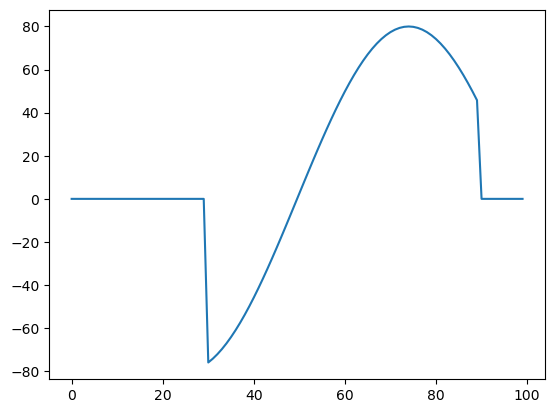

In [105]:
#init=-80*np.sin(4*np.pi*Y[0,60:90])
plt.plot(Q[10,:,1])

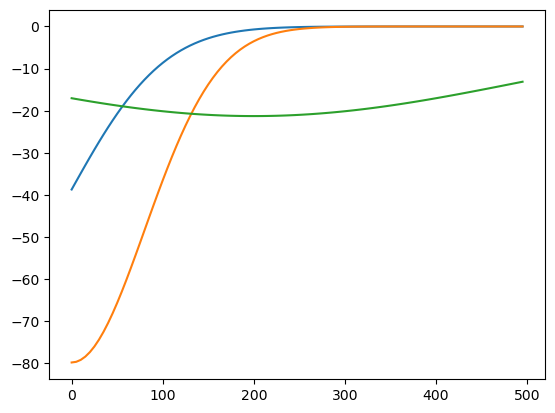

In [123]:
def gaussian(x, mu, sig):
    return (
        1.0 / (np.sqrt(2.0 * np.pi) * sig) * np.exp(-np.power((x - mu) / sig, 2.0) / 2)
    )


x_values = np.arange(0,500 , 5)
for mu, sig in [(-100, 100), (0, 80), (200, 300)]:
    plt.plot(x_values, -16000*gaussian(x_values, mu, sig))

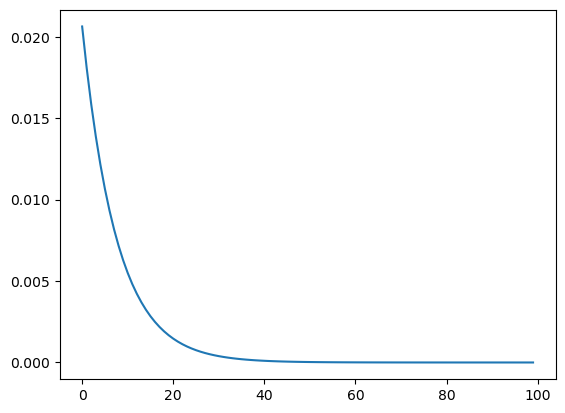

In [92]:
plt.plot(Q[10,:,1])

In [ ]:
Q=np.zeros((nx,ny,nt), dtype=dtype)
Q[:,70:90,1]=-80



In [ ]:
f = open('Qnet.bin','wb')
write_with_byte_inversion(f, Q)
f.close()

In [89]:
#Dimensions of grid

nx=20
ny=100
# Size of domain
Ly=500e3

# Flux
Qo=200

# Horizontal resolution (m)
#Variable resolution
res1=2*Ly/(3*ny);
L1=Ly/2;
L2=Ly - L1;
n2=ny - (L1/res1);
res2=L2/n2;
A=res2 - res1;
iswitch1=L1/res1;
width=4000;
dy=np.zeros(ny);
for i in range(ny):
    dy[i] = res1 + 0.5*A*( tanh( (i-iswitch1)/width) + 1);





# Flux
Qo=200;

y=np.zeros(ny);
x[0] = dy[1];
for i in np.arange(1,ny,1):
    y[i]=y[i-1] + dy[i]




#Tanh function for cooling
yswitch = 250e3 + Ly/2.0
qlength = 100e3
Q=0.0*np.ones((nx,ny,nt))
for i in range(ny):
    Q[:,i,1] = Q[:,i,1] + Qo*(tanh((Lx-y[i]-yswitch)/qlength) + 1)




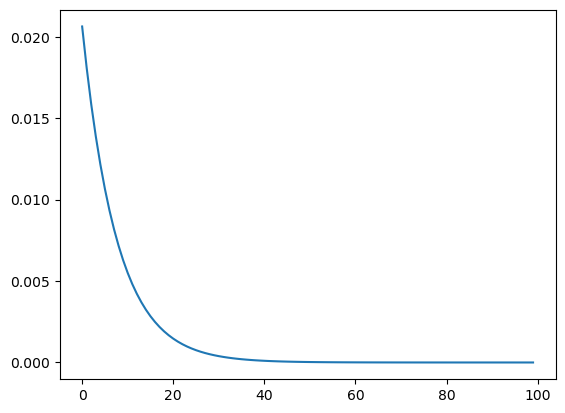

In [90]:
plt.plot(Q[10,:,1])